## **Download dataset and import required Libraries**

In [73]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Read Dataset and Preprocessing**

In [2]:
data = pd.read_csv('/content/spam.csv',delimiter=',',encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [5]:
data.shape

(5572, 5)

In [6]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
#Dropping Missing Values

data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [28]:
data=data.rename(
{
    "v1":"Category",
    "v2":"Message"
},
    axis=1
)
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
data["Message Length"]=data["Message"].apply(len)

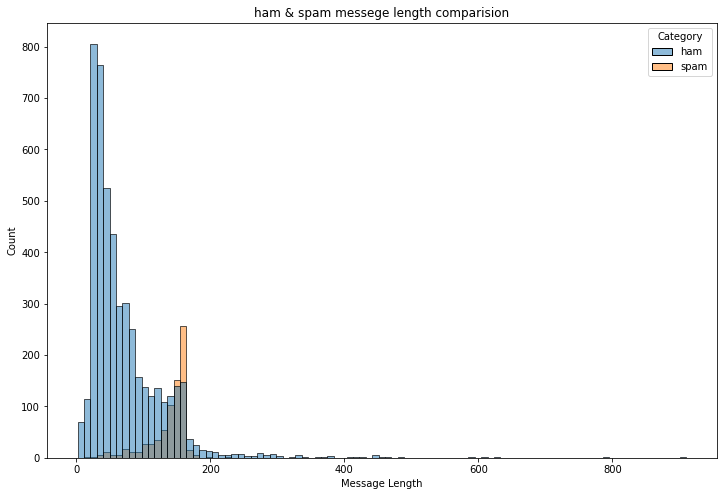

In [31]:
fig=plt.figure(figsize=(12,8))
sns.histplot(
    x=data["Message Length"],
    hue=data["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [32]:
ham_desc=data[data["Category"]=="ham"]["Message Length"].describe()
spam_desc=data[data["Category"]=="spam"]["Message Length"].describe()

print("Ham Messege Length Description:\n",ham_desc)
print("************************************")
print("Spam Message Length Description:\n",spam_desc)

Ham Messege Length Description:
 count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: Message Length, dtype: float64
************************************
Spam Message Length Description:
 count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: Message Length, dtype: float64


In [33]:
data.describe(include="all")

,Category,Message,Message Length
count,5572,5572,5572.000000
unique,2,5169,NaN
top,ham,"Sorry, I'll call later",NaN
freq,4825,30,NaN
mean,NaN,NaN,80.118808
std,NaN,NaN,59.690841
min,NaN,NaN,2.000000
25%,NaN,NaN,36.000000
50%,NaN,NaN,61.000000
75%,NaN,NaN,121.000000


In [34]:
data["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

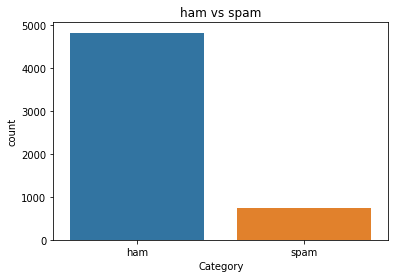

In [36]:
sns.countplot(
    data=data,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [37]:
ham_count=data["Category"].value_counts()[0]
spam_count=data["Category"].value_counts()[1]

total_count=data.shape[0]

print("Ham contains:{:.2f}% of total data.".format(ham_count/total_count*100))
print("Spam contains:{:.2f}% of total data.".format(spam_count/total_count*100))

Ham contains:86.59% of total data.
Spam contains:13.41% of total data.


In [38]:
minority_len=len(data[data["Category"]=="spam"])
majority_len=len(data[data["Category"]=="ham"])

#store the indices of majority and minority class
minority_indices=data[data["Category"]=="spam"].index
majority_indices=data[data["Category"]=="ham"].index

#generate new majority indices from the total majority_indices
#with size equal to minority class length so we obtain equivalent number of indices length
random_majority_indices=np.random.choice(
    majority_indices,
    size=minority_len,
    replace=False
)

#concatenate the two indices to obtain indices of new dataframe
undersampled_indices=np.concatenate([minority_indices,random_majority_indices])

#create df using new indices
df=data.loc[undersampled_indices]

#shuffle the sample
df=df.sample(frac=1)

#reset the index as its all mixed
df=df.reset_index()

#drop the older index
df=df.drop(
    columns=["index"],
)

In [39]:
df.shape

(1494, 3)

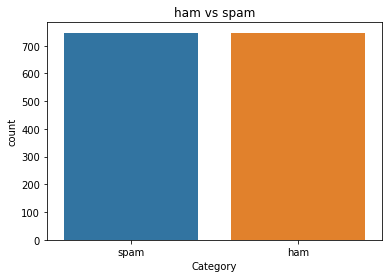

In [40]:
sns.countplot(
    data=df,
    x="Category"
)
plt.title("ham vs spam")
plt.show()

In [42]:
df["Label"]=df["Category"].map(
    {
        "ham":0,
        "spam":1
    }
)
df.head()

,Category,Message,Message Length,Label
0,spam,XMAS iscoming & ur awarded either å£500 CD gif...,157,1
1,ham,"Just dropped em off, omw back now",33,0
2,ham,You've already got a flaky parent. It'snot sup...,237,0
3,ham,"Ask g or iouri, I've told the story like ten t...",58,0
4,ham,Had the money issue weigh me down but thanks t...,121,0


In [43]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

In [46]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [47]:
#declare empty list to store tokenized message
corpus=[]

#iterate through the df["Message"]
for message in df["Message"]:
    
    #replace every special characters, numbers etc.. with whitespace of message
    #It will help retain only letter/alphabets
    message=re.sub("[^a-zA-Z]"," ",message)
    
    #convert every letters to its lowercase
    message=message.lower()
    
    #split the word into individual word list
    message=message.split()
    
    #perform stemming using PorterStemmer for all non-english-stopwords
    message=[stemmer.stem(words)
            for words in message
             if words not in set(stopwords.words("english"))
            ]
    #join the word lists with the whitespace
    message=" ".join(message)
    
    #append the message in corpus list
    corpus.append(message)

In [48]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size=10000

oneHot_doc=[one_hot(words,n=vocab_size)
           for words in corpus
           ]

In [49]:
df["Message Length"].describe()

count    1494.000000
mean      105.075636
std        58.958058
min         2.000000
25%        49.000000
50%       117.000000
75%       153.000000
max       632.000000
Name: Message Length, dtype: float64

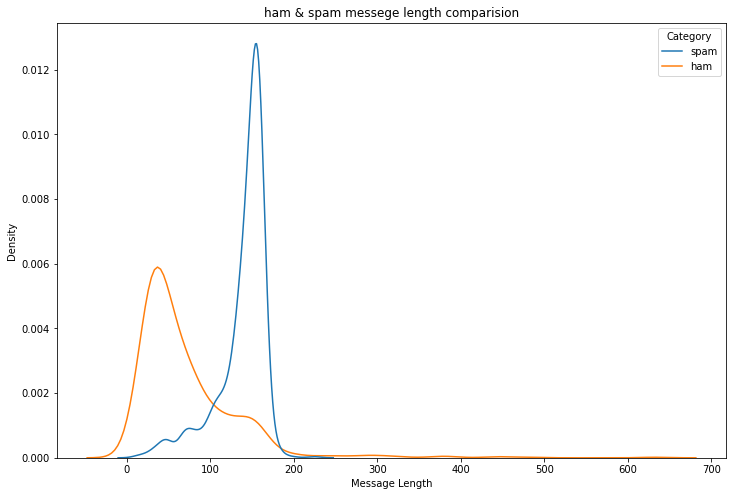

In [50]:
fig=plt.figure(figsize=(12,8))
sns.kdeplot(
    x=df["Message Length"],
    hue=df["Category"]
)
plt.title("ham & spam messege length comparision")
plt.show()

In [51]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_len=200
embedded_doc=pad_sequences(
    oneHot_doc,
    maxlen=sentence_len,
    padding="pre"
)

In [52]:
extract_features=pd.DataFrame(
    data=embedded_doc
)
target=df["Label"]

In [53]:
df_final=pd.concat([extract_features,target],axis=1)

In [54]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Label
0,0,0,0,0,0,0,0,0,0,0,...,8863,2248,2551,3658,3708,5554,3035,5742,3690,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7750,9672,3756,7739,0
2,0,0,0,0,0,0,0,0,0,0,...,9969,5742,555,4433,1661,4199,32,4199,5813,0
3,0,0,0,0,0,0,0,0,0,0,...,3297,5811,2328,2581,4356,1525,2788,4177,5986,0
4,0,0,0,0,0,0,0,0,0,0,...,6684,7696,1036,589,309,3926,8541,3628,7696,0


In [55]:
X=df_final.drop("Label",axis=1)
y=df_final["Label"]

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(
    X_trainval,
    y_trainval,
    random_state=42,
    test_size=0.15
)

## **Create Model**

In [66]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential

model=Sequential()

## **Add Layers**

In [67]:
feature_num=100
model.add(
    Embedding(
        input_dim=vocab_size,
        output_dim=feature_num,
        input_length=sentence_len
    )
)
model.add(
    LSTM(
    units=128
    )
)

model.add(
    Dense(
        units=1,
        activation="sigmoid"
    )
)

## **Compile the Model**

In [68]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(
    learning_rate=0.001
    ),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 100)          1000000   
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,117,377
Trainable params: 1,117,377
Non-trainable params: 0
_________________________________________________________________


## **Fit the model**

In [69]:
model.fit(
    X_train,
    y_train,
    validation_data=(
        X_val,
        y_val
    ),
    epochs=10
)

Epoch 1/10
34/34 [==============================] - 15s 381ms/step - loss: 0.5037 - accuracy: 0.7254 - val_loss: 0.2602 - val_accuracy: 0.9110
Epoch 2/10
34/34 [==============================] - 11s 323ms/step - loss: 0.1761 - accuracy: 0.9443 - val_loss: 0.1096 - val_accuracy: 0.9738
Epoch 3/10
34/34 [==============================] - 14s 411ms/step - loss: 0.0556 - accuracy: 0.9814 - val_loss: 0.0988 - val_accuracy: 0.9686
Epoch 4/10
34/34 [==============================] - 12s 361ms/step - loss: 0.0207 - accuracy: 0.9944 - val_loss: 0.1214 - val_accuracy: 0.9686
Epoch 5/10
34/34 [==============================] - 12s 333ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.1306 - val_accuracy: 0.9529
Epoch 6/10
34/34 [==============================] - 11s 323ms/step - loss: 0.0132 - accuracy: 0.9963 - val_loss: 0.1043 - val_accuracy: 0.9581
Epoch 7/10
34/34 [==============================] - 11s 323ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.1496 - val_accuracy: 0.9529

## **Save & Test the Model**

In [70]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

8/8 [==============================] - 1s 87ms/step


In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix
score=accuracy_score(y_test,y_pred)
print("Test Score:{:.2f}%".format(score*100))

Test Score:95.11%
